## Train a Basic Sentiment Classification Model for Future Use
##### Data source: https://github.com/z17176/Chinese_conversation_sentiment

In [2]:
import re
import pandas as pd
import string
import numpy as np
import nltk
from nltk import pos_tag
from nltk.tag import StanfordNERTagger
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD, SparsePCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning

In [3]:
# 导入中文数据集
rawData = pd.read_csv("/Users/jojoli/Documents/夏校申请:项目制作/英才计划/正式培养/chinese/datasets/sentiment_XS_30k.txt",
                    delimiter=",", header=0,skiprows=0)
rawData.head()
rawData.shape

(29613, 2)

#### Preprocessing

In [4]:
# Tokenize -- create a new tokenized column
import re

def tokenize(text):
    toks = str(text).split()
    return toks

rawData['tokenized'] = rawData['text'].apply(lambda x : tokenize(x.lower()))
rawData.head()

,labels,text,tokenized
0,positive,奖励 就是 亲,"[奖励, 就是, 亲]"
1,positive,谢谢 妹妹 加 朋友,"[谢谢, 妹妹, 加, 朋友]"
2,positive,喜欢 吃 南浮,"[喜欢, 吃, 南浮]"
3,positive,好 吧 小 很 强悍 怕 不,"[好, 吧, 小, 很, 强悍, 怕, 不]"
4,negative,他 女朋友 旁边 所以 不 方便 跟 说话,"[他, 女朋友, 旁边, 所以, 不, 方便, 跟, 说话]"


In [5]:
rawData.to_csv('/Users/jojoli/Documents/夏校申请:项目制作/英才计划/正式培养/chinese/datasets/sentiment_XS_30k_cleaned.csv', index=False)


### Training

In [6]:
df = pd.read_csv("/Users/jojoli/Documents/夏校申请:项目制作/英才计划/正式培养/chinese/datasets/sentiment_XS_30k_cleaned.csv")
df.head(5)

,labels,text,tokenized
0,positive,奖励 就是 亲,"['奖励', '就是', '亲']"
1,positive,谢谢 妹妹 加 朋友,"['谢谢', '妹妹', '加', '朋友']"
2,positive,喜欢 吃 南浮,"['喜欢', '吃', '南浮']"
3,positive,好 吧 小 很 强悍 怕 不,"['好', '吧', '小', '很', '强悍', '怕', '不']"
4,negative,他 女朋友 旁边 所以 不 方便 跟 说话,"['他', '女朋友', '旁边', '所以', '不', '方便', '跟', '说话']"


In [9]:
# Using TF-IDF
vectorizer = TfidfVectorizer()
vectorizer.fit(df['tokenized'])
df_text = vectorizer.transform(df['tokenized'])
print(df_text.shape)

# df_tfidf = pd.DataFrame(df_text)
df_targeted = df.labels
X_train, X_test, y_train, y_test = train_test_split(df_text, df_targeted ,test_size=0.3, random_state=42)

(29613, 16440)


In [ ]:
# Random Forest

import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_pred, y_test))
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of Random Forest on test set: {:.8f}'.format(accuracy_score(y_pred, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      3138
    positive       0.97      0.87      0.92      5746

    accuracy                           0.90      8884
   macro avg       0.89      0.91      0.89      8884
weighted avg       0.91      0.90      0.90      8884

--------------The Accuracy of the model----------------------------
Accuracy of Multinomial Naive Bayes on test set: 0.89936965


Text(0.5, 1.05, 'Confusion_matrix')

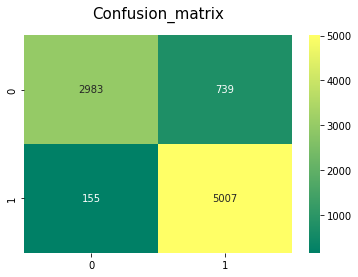

In [16]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

multinomialnb = MultinomialNB()
multinomialnb.fit(X_train, y_train)
print("Training completed")
y_pred_2 = multinomialnb.predict(X_test)
print(metrics.classification_report(y_pred_2, y_test))
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of Multinomial Naive Bayes on test set: {:.8f}'.format(accuracy_score(y_pred_2, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred_2),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [11]:
# SVM

from sklearn.svm import LinearSVC

linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)
print("Training completed")
y_pred_3 = linearsvc.predict(X_test)
print(metrics.classification_report(y_pred_3, y_test))
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of SVM on test set: {:.8f}'.format(accuracy_score(y_pred_3, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred_3),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

              precision    recall  f1-score   support

    negative       0.82      0.95      0.88      3239
    positive       0.97      0.88      0.92      5645

    accuracy                           0.91      8884
   macro avg       0.90      0.92      0.90      8884
weighted avg       0.91      0.91      0.91      8884

--------------The Accuracy of the model----------------------------
Accuracy of SVM on test set: 0.90668618


Text(0.5, 1.05, 'Confusion_matrix')

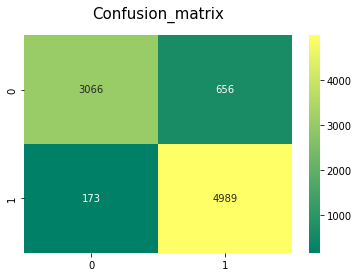

In [11]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/Users/jojoli/Documents/夏校申请:项目制作/英才计划/正式培养/chinese/code/basic_model_svc.sav'
# pickle.dump(linearsvc, open(filename, 'wb'))

# load the model
load_model = pickle.load(open(filename, 'rb'))

y_pred_4 = load_model.predict(X_test)
print(metrics.classification_report(y_pred_4, y_test))
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of SVM on test set: {:.8f}'.format(accuracy_score(y_pred_4, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred_4),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [16]:
word = '乱'
temp = pd.DataFrame({'adj':[word]})
basic_df = pd.read_csv("/Users/jojoli/Documents/夏校申请:项目制作/英才计划/正式培养/chinese/datasets/sentiment_XS_30k_cleaned.csv")
vectorizer = TfidfVectorizer()
vectorizer.fit(basic_df["tokenized"])
test = vectorizer.transform(temp)
print(test.shape)

# df_test = pd.DataFrame(test)
pred = load_model.predict(test)
print(pred)

(1, 16440)
['positive']


### Use it for Imagery

In [45]:
import functions
functions.read_parsing_file()
df = pd.read_csv("/Users/jojoli/Documents/夏校申请:项目制作/英才计划/正式培养/chinese/datasets/Tang_Dynasty_parsed.csv")
basic_df = pd.read_csv("/Users/jojoli/Documents/夏校申请:项目制作/英才计划/正式培养/chinese/datasets/sentiment_XS_30k_cleaned.csv")
all_pred = []
i = 0
for each in df["dep_adjs"]:
    pred = []
    temp_df_noun = pd.DataFrame({"noun":[df["all_nouns"][i]]})
    test_noun = vectorizer.transform(temp_df_noun)
    filename = "/Users/jojoli/Documents/夏校申请:项目制作/英才计划/正式培养/chinese/code/basic_model_svc.sav"
    load_model = pickle.load(open(filename, 'rb'))
    t2 = load_model.predict(test_noun)
    for word in each:
        if (word != '[' and word != "'" and word != "," and word != "\\" and word != "t" and word != "，" and word != "]" and word != " "):
            temp_df_adj = pd.DataFrame({'adj':[word]})
            test_adj = vectorizer.transform(temp_df_adj)

            # sentiment classification
            t1 = load_model.predict(test_adj)
            pred.append(t1[0])
            print(t1, " ", t2, " ", word)
    i+=1
    pred.append(t2[0])
    all_pred.append(pred)
    print("Done")
df['adj_tag'] = all_pred

# Save
df.to_csv("/Users/jojoli/Documents/夏校申请:项目制作/英才计划/正式培养/chinese/datasets/Tang_Dynasty_adj-tagged.csv", index=False)
print("Imagery classification completed.")

Parsing analysis completed.

['positive']   ['positive']   靜
['positive']   ['positive']   深
['positive']   ['positive']   深
['positive']   ['positive']   深
Done
['positive']   ['positive']   牵
['positive']   ['positive']   牵
['positive']   ['positive']   不
['positive']   ['positive']   长
['positive']   ['positive']   如
['positive']   ['positive']   不
['positive']   ['positive']   一
['positive']   ['positive']   乃
['positive']   ['positive']   乃
['positive']   ['positive']   乃
['positive']   ['positive']   长
['positive']   ['positive']   长
['positive']   ['positive']   当
['positive']   ['positive']   不
['positive']   ['positive']   且
['positive']   ['positive']   且
Done
['positive']   ['positive']   因
Done
['positive']   ['positive']   复
Done
['positive']   ['positive']   不
['positive']   ['positive']   和
Done
['positive']   ['positive']   高
Done
['positive']   ['positive']   最
['positive']   ['positive']   新
Done
['positive']   ['positive']   仍
['positive']   ['positive']   忽
['positi

In [40]:
word = "wow"
df["all_nouns"][0]

"['鬓翁', '貌', '心', '竹', '境界', '言']"